In [1]:
import json
import pandas as pd

# Lees de JSON-bestanden regel voor regel in en maak een DataFrame
file_path = '../Loopdata/run_gebruikersprofielen.json'

# Definieer een lijst om de data in te verzamelen
profiles_data = []

# Open het bestand en lees elke regel
with open(file_path, 'r') as file:
    for line in file:
        # Laad de JSON-objecten
        profile = json.loads(line)
        profiles_data.append(profile)

# Maak een DataFrame van de verzamelde data
df_profiles = pd.DataFrame(profiles_data)

# We bekijken de verdeling van de volgende velden
fields_of_interest = ['average_speeds', 'average_altitude_changes', 'average_distances', 'average_heartrates', 'average_condition_value']

# Beschrijvende statistieken voor de velden van interesse
distribution_summary = df_profiles[fields_of_interest].describe()

print(distribution_summary)


       average_speeds  average_altitude_changes  average_distances  \
count      473.000000                473.000000         473.000000   
mean        11.322167                 58.458254          12.328902   
std          2.561862                 56.932650           5.974915   
min          5.258966                  4.500000           3.471013   
25%          9.951959                 29.285714           9.447211   
50%         11.140148                 48.792308          11.393861   
75%         12.198519                 68.237209          14.064035   
max         29.775218                676.700000          62.245384   

       average_condition_value  
count               473.000000  
mean                  0.881537  
std                   0.578145  
min                   0.211434  
25%                   0.652181  
50%                   0.801609  
75%                   0.965459  
max                   6.228027  


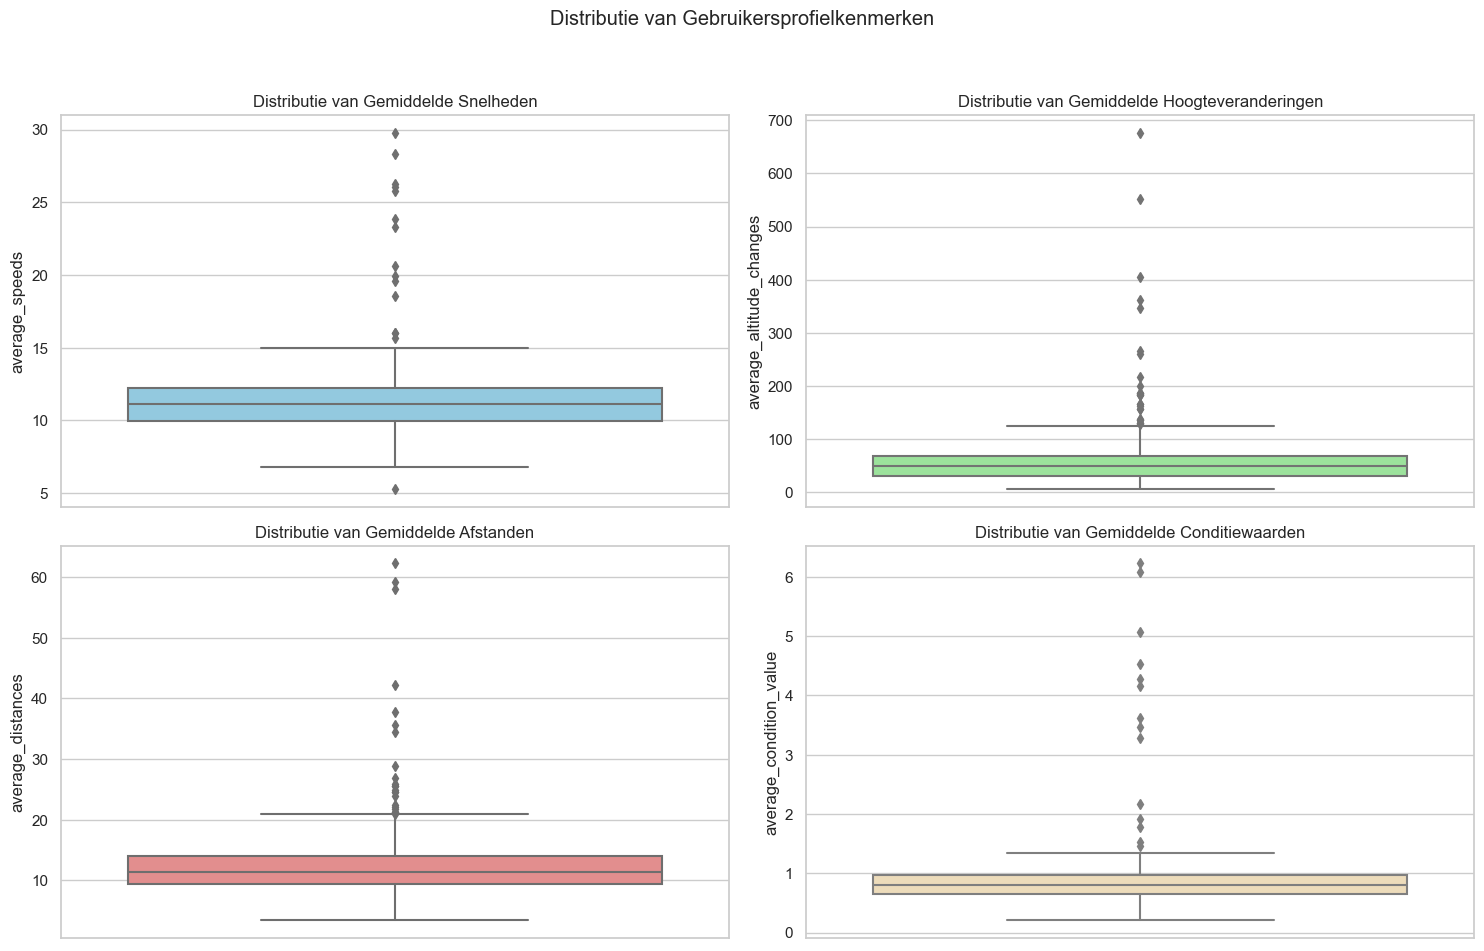

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Instellen van de visuele stijl van de plots
sns.set(style="whitegrid")

# Creëren van figure en axes objecten voor de subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Distributie van Gebruikersprofielkenmerken')

# Plot voor average_speeds
sns.boxplot(ax=axes[0, 0], data=df_profiles, y='average_speeds', color='skyblue')
axes[0, 0].set_title('Distributie van Gemiddelde Snelheden')

# Plot voor average_altitude_changes
sns.boxplot(ax=axes[0, 1], data=df_profiles, y='average_altitude_changes', color='lightgreen')
axes[0, 1].set_title('Distributie van Gemiddelde Hoogteveranderingen')

# Plot voor average_distances
sns.boxplot(ax=axes[1, 0], data=df_profiles, y='average_distances', color='lightcoral')
axes[1, 0].set_title('Distributie van Gemiddelde Afstanden')

# Plot voor average_condition_value
sns.boxplot(ax=axes[1, 1], data=df_profiles, y='average_condition_value', color='wheat')
axes[1, 1].set_title('Distributie van Gemiddelde Conditiewaarden')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Aanpassen van de layout voor titelruimte
plt.show()


### locatie gebruikers

In [2]:
import pandas as pd
import json
import folium
from IPython.display import display

# Pad naar de bestanden
user_profiles_path = '../Loopdata/run_gebruikersprofielen.json'

# Laad de bestanden
with open(user_profiles_path, 'r') as file:
    user_profiles_content = (json.loads(line) for line in file)
    user_profiles_df = pd.DataFrame(user_profiles_content)

# Voeg de meest voorkomende locatie van de gebruiker toe aan de DataFrame
user_profiles_df[['most_common_lat', 'most_common_lon']] = pd.DataFrame(user_profiles_df['average_location'].tolist(), index=user_profiles_df.index)

# Maak een kaartobject
m = folium.Map(location=[52.3676, 4.9041], zoom_start=8)  # Startlocatie is Amsterdam voor de weergave

# Voeg markers toe voor de meest voorkomende locaties van gebruikers
for _, user in user_profiles_df.iterrows():
    folium.Marker([user['most_common_lat'], user['most_common_lon']], 
                  popup=f"User: {user['userId']}").add_to(m)

# Toon de kaart in de notebook
display(m)


In [6]:
import json
from geopy.geocoders import Nominatim
from collections import Counter

def find_country(latitude, longitude, geolocator):
    try:
        location = geolocator.reverse((latitude, longitude), language='en')
        if location:
            return location.raw.get('address', {}).get('country', 'Onbekend')
    except Exception as e:
        print(e)

def find_country_from_json(file_path):
    country_counts = Counter()
    geolocator = Nominatim(user_agent="geoapiExercises")

    with open(file_path, 'r', encoding='utf-8') as file:
        for line in file:
            try:
                data = json.loads(line)
                if 'average_location' in data:
                    latitude, longitude = data['average_location']
                    country = find_country(latitude, longitude, geolocator)
                    country_counts[country] += 1
            except (KeyError, IndexError, json.JSONDecodeError):
                continue

    return country_counts

# Replace 'file_path' with the path to your JSON file
file_path = '../Loopdata/run_gebruikersprofielen.json'
country_distribution = find_country_from_json(file_path)
print(country_distribution)


Counter({'Denmark': 105, 'Poland': 52, 'Spain': 39, 'United States': 27, 'France': 22, 'United Kingdom': 19, 'Thailand': 19, None: 16, 'Norway': 15, 'Germany': 13, 'Russia': 13, 'Sweden': 12, 'Brazil': 11, 'Latvia': 9, 'Czechia': 8, 'China': 8, 'Belgium': 6, 'Estonia': 6, 'Italy': 6, 'Lithuania': 6, 'Canada': 6, 'Slovakia': 5, 'Finland': 5, 'Netherlands': 4, 'Greece': 4, 'Portugal': 4, 'Ukraine': 4, 'South Africa': 3, 'Hungary': 3, 'Ireland': 3, 'Singapore': 2, 'India': 2, 'Romania': 2, 'New Zealand': 2, 'Iran': 1, 'Turkey': 1, 'Namibia': 1, 'Mexico': 1, 'Vietnam': 1, 'Iceland': 1, 'Croatia': 1, 'Austria': 1, 'South Korea': 1, 'Australia': 1, 'Saudi Arabia': 1, 'Malta': 1})


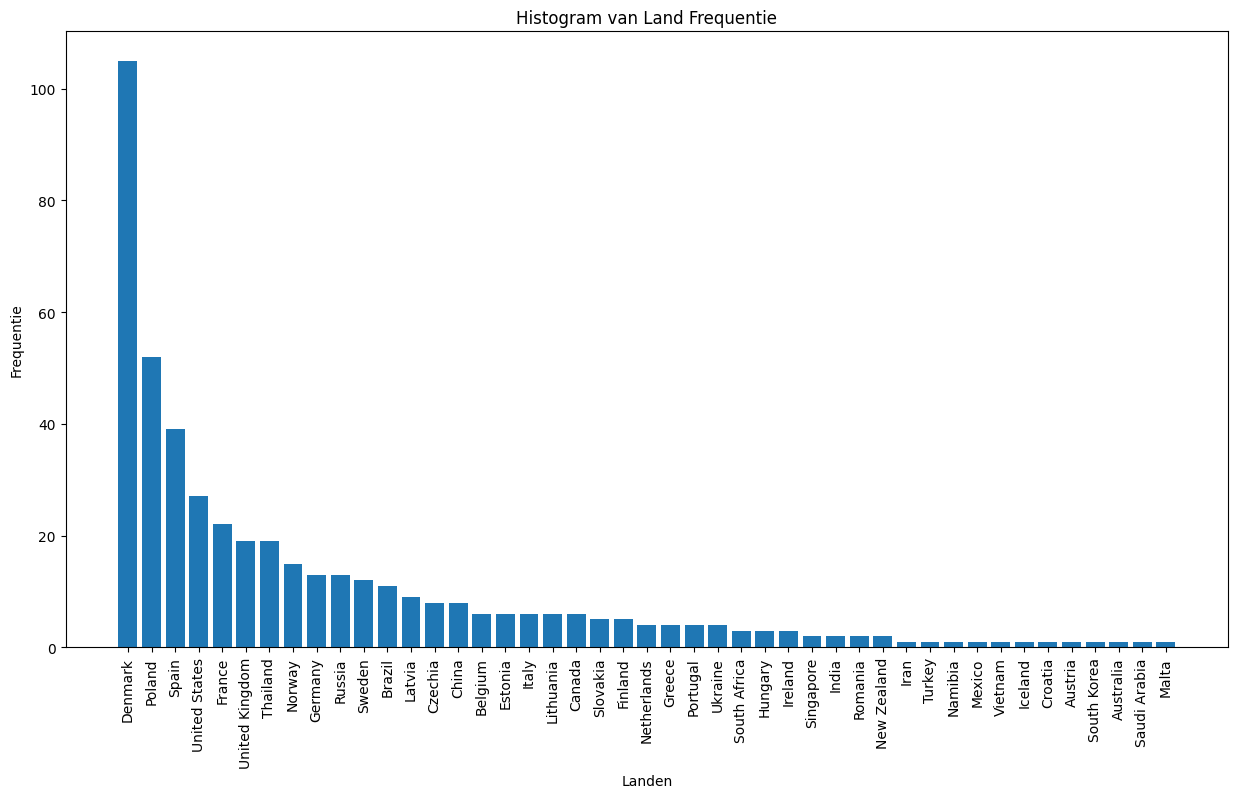

In [7]:
import matplotlib.pyplot as plt

# Gegeven waarden
data = {'Denmark': 105, 'Poland': 52, 'Spain': 39, 'United States': 27, 'France': 22, 'United Kingdom': 19, 'Thailand': 19, None: 16, 'Norway': 15, 'Germany': 13, 'Russia': 13, 'Sweden': 12, 'Brazil': 11, 'Latvia': 9, 'Czechia': 8, 'China': 8, 'Belgium': 6, 'Estonia': 6, 'Italy': 6, 'Lithuania': 6, 'Canada': 6, 'Slovakia': 5, 'Finland': 5, 'Netherlands': 4, 'Greece': 4, 'Portugal': 4, 'Ukraine': 4, 'South Africa': 3, 'Hungary': 3, 'Ireland': 3, 'Singapore': 2, 'India': 2, 'Romania': 2, 'New Zealand': 2, 'Iran': 1, 'Turkey': 1, 'Namibia': 1, 'Mexico': 1, 'Vietnam': 1, 'Iceland': 1, 'Croatia': 1, 'Austria': 1, 'South Korea': 1, 'Australia': 1, 'Saudi Arabia': 1, 'Malta': 1}

# Verwijder de None sleutel voor visualisatie
if None in data:
    del data[None]

# Sorteer de data op basis van de waarden (frequentie)
sorted_data = dict(sorted(data.items(), key=lambda item: item[1], reverse=True))

# Maak een histogram
plt.figure(figsize=(15, 8))
plt.bar(sorted_data.keys(), sorted_data.values())
plt.xlabel('Landen')
plt.ylabel('Frequentie')
plt.title('Histogram van Land Frequentie')
plt.xticks(rotation=90)  # Draai de labels voor betere leesbaarheid
plt.show()


In [8]:
import matplotlib.pyplot as plt

# Gegeven waarden
data = {'Denmark': 105, 'Poland': 52, 'Spain': 39, 'United States': 27, 'France': 22, 'United Kingdom': 19, 'Thailand': 19, None: 16, 'Norway': 15, 'Germany': 13, 'Russia': 13, 'Sweden': 12, 'Brazil': 11, 'Latvia': 9, 'Czechia': 8, 'China': 8, 'Belgium': 6, 'Estonia': 6, 'Italy': 6, 'Lithuania': 6, 'Canada': 6, 'Slovakia': 5, 'Finland': 5, 'Netherlands': 4, 'Greece': 4, 'Portugal': 4, 'Ukraine': 4, 'South Africa': 3, 'Hungary': 3, 'Ireland': 3, 'Singapore': 2, 'India': 2, 'Romania': 2, 'New Zealand': 2, 'Iran': 1, 'Turkey': 1, 'Namibia': 1, 'Mexico': 1, 'Vietnam': 1, 'Iceland': 1, 'Croatia': 1, 'Austria': 1, 'South Korea': 1, 'Australia': 1, 'Saudi Arabia': 1, 'Malta': 1}

# count the total number of users
total_users = sum(data.values())
print(f'Total number of users: {total_users}')

Total number of users: 473


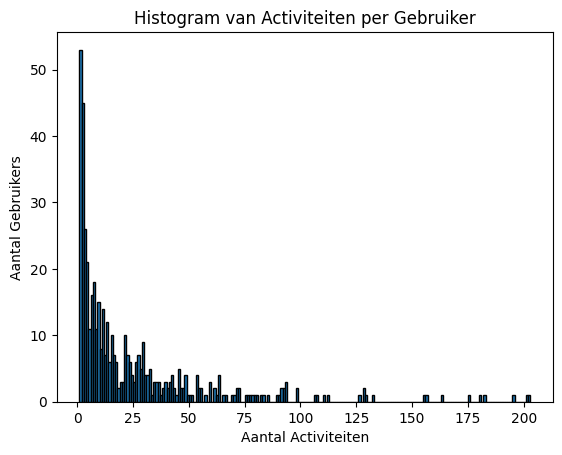

In [1]:
import json
import matplotlib.pyplot as plt

# Functie om het aantal activiteiten per gebruiker te tellen
def count_activities(lines):
    activity_count = {}
    for line in lines:
        data = json.loads(line)
        user_id = data["userId"]
        activities = len(data["activity_ids"])
        activity_count[user_id] = activities
    return activity_count

# Bestandspad naar je JSON-bestand
file_path = '../Loopdata/run_gebruikersprofielen.json' # Vervang dit met het pad naar je bestand

# Bestand inlezen
with open(file_path, 'r', encoding='utf-8') as file:
    lines = file.readlines()

# Aantal activiteiten per gebruiker tellen
user_activities = count_activities(lines)

# Histogram maken
activity_values = list(user_activities.values())
plt.hist(activity_values, bins=range(1, max(activity_values)+1), edgecolor='black')
plt.title('Histogram van Activiteiten per Gebruiker')
plt.xlabel('Aantal Activiteiten')
plt.ylabel('Aantal Gebruikers')
plt.show()
